# convolutional neural network (CNN)

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Define paths to the train, test, and validation folders
train_data_dir = './data-weed classification/train'
validation_data_dir = './data-weed classification/val'
test_data_dir = './data-weed classification/test'

In [3]:
# Define image size and batch size
img_width, img_height = 150, 150
batch_size = 32

In [4]:
# Create ImageDataGenerator instances for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 1440 images belonging to 2 classes.
Found 444 images belonging to 2 classes.


In [6]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [7]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/20


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 45s 875ms/step - accuracy: 0.5566 - loss: 0.7044 - val_accuracy: 0.6106 - val_loss: 0.6678
Epoch 2/20


C:\Users\Lenovo\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5714 - val_loss: 0.3480
Epoch 3/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 31s 637ms/step - accuracy: 0.5516 - loss: 0.6918 - val_accuracy: 0.5986 - val_loss: 0.6678
Epoch 4/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.3118
Epoch 5/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 30s 631ms/step - accuracy: 0.5788 - loss: 0.6779 - val_accuracy: 0.6514 - val_loss: 0.6151
Epoch 6/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 0.2939
Epoch 7/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 30s 626ms/step - accuracy: 0.6240 - loss: 0.6217 - val_accuracy: 0.6562 - val_loss: 0.5814
Epoch 8/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6786 - val_loss: 0.2693
Epoch 9/20
45/45 ━━━━━━━━━━━━━━━━━━━━ 33s 691ms/step - accuracy: 0.6534 - loss: 0.5703 -

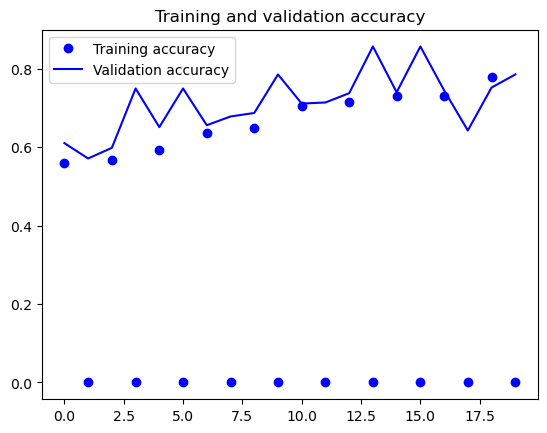

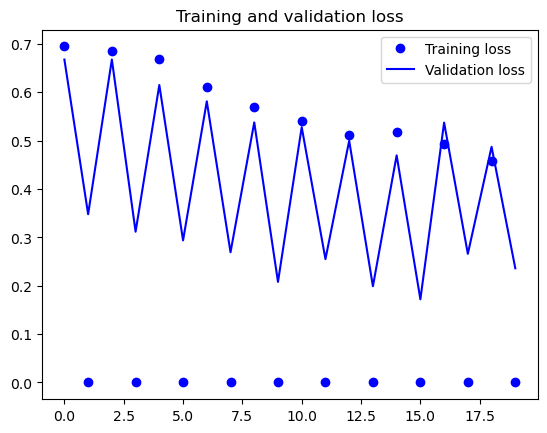

In [9]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [10]:
# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_acc}")

Found 474 images belonging to 2 classes.
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 298ms/step - accuracy: 0.8071 - loss: 0.4340
Test accuracy: 0.8035714030265808


#  MobileNetV2 model

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [12]:
# Define paths to the train, test, and validation folders
train_data_dir = './data-weed classification/train'
validation_data_dir = './data-weed classification/val'
test_data_dir = './data-weed classification/test'

In [13]:
# Define image size, batch size, and number of epochs
img_width, img_height = 224, 224
batch_size = 32
epochs = 10

In [14]:
# Create ImageDataGenerator instances for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)



In [15]:
# Generate batches of augmented data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)



Found 1440 images belonging to 2 classes.
Found 444 images belonging to 2 classes.


In [16]:
# Load the MobileNetV2 model (pre-trained on ImageNet)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 145s 15us/step


In [18]:
# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False



In [19]:
# Add custom classification layers on top of the base model
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [20]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)



Epoch 1/10


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.6205 - loss: 0.6728 - val_accuracy: 0.8389 - val_loss: 0.4244
Epoch 2/10


C:\Users\Lenovo\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8214 - val_loss: 0.2220
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 54s 1s/step - accuracy: 0.8407 - loss: 0.3928 - val_accuracy: 0.9135 - val_loss: 0.3056
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8929 - val_loss: 0.1436
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8916 - loss: 0.3156 - val_accuracy: 0.9231 - val_loss: 0.2558
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9643 - val_loss: 0.1340
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.9071 - loss: 0.2647 - val_accuracy: 0.9159 - val_loss: 0.2331
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.9286 - val_loss: 0.0942
Epoch 9/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.9134 - loss: 0.2453 - val_acc

In [22]:
# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_acc}")



Found 474 images belonging to 2 classes.
14/14 ━━━━━━━━━━━━━━━━━━━━ 11s 750ms/step - accuracy: 0.9519 - loss: 0.2246
Test accuracy: 0.9308035969734192


In [27]:
# Make predictions
Y_pred = model.predict(test_generator, steps=len(test_generator), verbose=1)
y_pred = (Y_pred > 0.5)

# Calculate precision, recall, and F1-score
print("Classification Report:")
print(classification_report(test_generator.classes[:len(Y_pred)], y_pred))


15/15 ━━━━━━━━━━━━━━━━━━━━ 13s 874ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.60      0.59       270
           1       0.44      0.42      0.43       204

    accuracy                           0.52       474
   macro avg       0.51      0.51      0.51       474
weighted avg       0.52      0.52      0.52       474



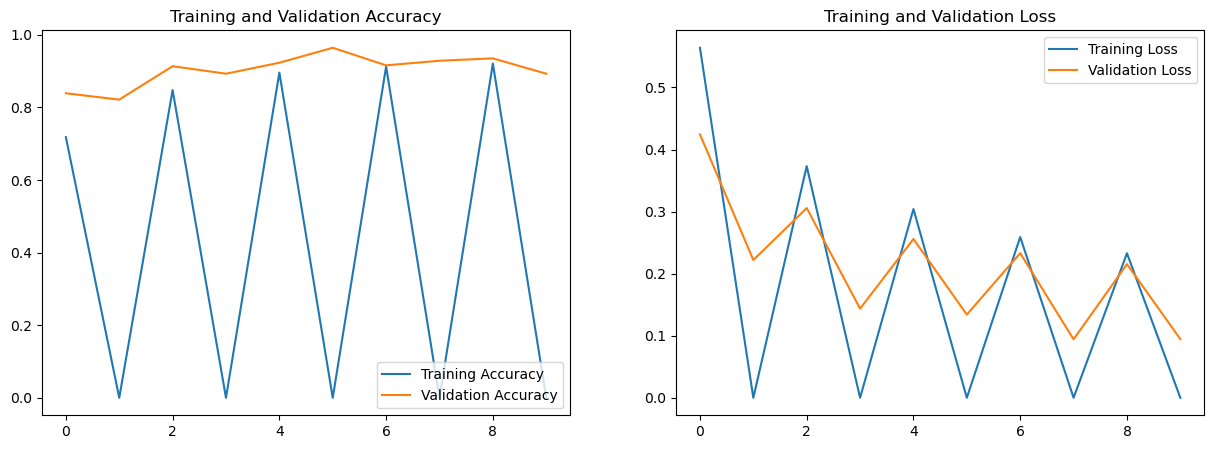

In [28]:
# Plot training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
